In [1]:
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

In [2]:
# Importing data
jhu_case_data = pd.read_csv('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
jhu_death_data = pd.read_csv('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

## Analysis for Ft. Carson

In [50]:
# Getting only Colorado
co_case_data = jhu_case_data[jhu_case_data['Province_State']=='Colorado']
co_death_data = jhu_death_data[jhu_death_data['Province_State']=='Colorado']

# Getting rid of stupid FIPS
co_case_data = co_case_data[co_case_data['FIPS']<10000]
co_death_data = co_death_data[co_death_data['FIPS']<10000]

In [51]:
## SET PLOTTING VARIABLES HERE
# Day to plot in first figure
date = '5/19/20'
# How far back to plot in second figure
delta = 7
# How far back to get rate compared to previous week
echo = 14

In [52]:
# Looking at the first five lines of the Colorado case data
co_case_data.head(5)

UID iso2 iso3  code3    FIPS     Admin2 Province_State  \
249  84008001   US  USA    840  8001.0      Adams       Colorado   
250  84008003   US  USA    840  8003.0    Alamosa       Colorado   
251  84008005   US  USA    840  8005.0   Arapahoe       Colorado   
252  84008007   US  USA    840  8007.0  Archuleta       Colorado   
253  84008009   US  USA    840  8009.0       Baca       Colorado   

    Country_Region        Lat       Long_  ... 5/10/20  5/11/20  5/12/20  \
249             US  39.874321 -104.336258  ...    2242     2278     2322   
250             US  37.572506 -105.788545  ...      25       32       33   
251             US  39.649775 -104.335362  ...    3272     3313     3370   
252             US  37.194742 -107.047687  ...       8        8        8   
253             US  37.319409 -102.560322  ...      12       12       12   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
249     2374     2448     2520     2575     2613     2640     2675  
250       33       37       38       39       41       42       43  
251     3464     3526     3583     3652     3703     3767     3827  
252        8        8        8        8        8        8        8  
253       12       12       12       12       12       12       12  

[5 rows x 130 columns]

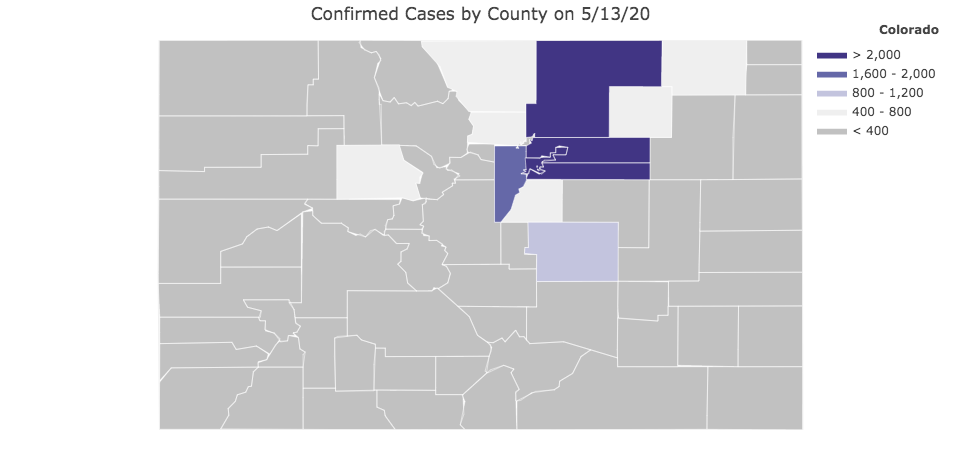

In [27]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

fips = co_case_data['FIPS']
values = co_case_data[date]

fig = ff.create_choropleth(fips=fips, values=values)
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['CO'],
    #locations=['Douglas', 'El Paso', 'Pueblo', 'Fremont', 'Teller',
               #'Elbert', 'Lincoln', 'Crowley', 'Custer'],
    binning_endpoints = [400,800,1200,1600,2000], 
    colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Colorado', title= f'Confirmed Cases by County on {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)


#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.layout.template = None
fig.show()

#plt.savefig('test.jpg',format='jpg')

In [28]:
from utils import create_new_key

date_cases = co_case_data[date]
old_date = create_new_key(date, delta)
old_date_cases = co_case_data[old_date]
period_cases = date_cases - old_date_cases

print(f'Total cases in Colorado last {delta} days: {sum(period_cases)}')

Total cases in Colorado last 7 days: 2722


In [29]:
from utils import create_new_key

# cases the previous week
date_cases = co_case_data[date]
prev_old_date = create_new_key(date, echo)
prev_old_date_cases = co_case_data[prev_old_date]
prev_period_cases = date_cases - prev_old_date_cases 

print(f'Total cases in Colorado last {echo} days: {sum(prev_period_cases)}')

Total cases in Colorado last 14 days: 5777


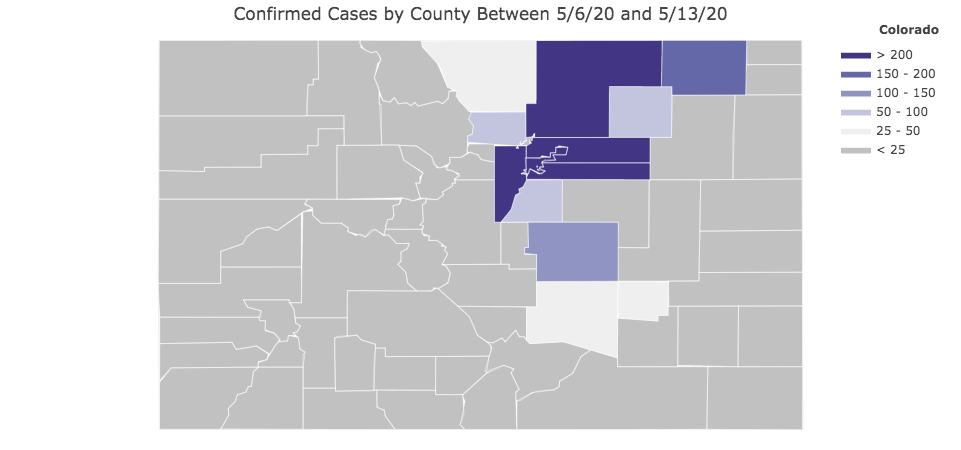

In [30]:
values = period_cases

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['CO'],
    colorscale=colorscale,
    #binning_endpoints = list(range(min(values+1), max(values), round((max(values)-min(values))/4))),
    binning_endpoints = [25,50,100,150,200],
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Colorado', title= f'Confirmed Cases by County Between {old_date} and {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

In [31]:
# Getting data for counties of interest

# List of counties of interest
counties_of_interest = ['Douglas', 'El Paso', 'Pueblo', 'Fremont', 'Teller', 'Elbert', 'Lincoln', 'Crowley', 'Custer']

# Dataframe for only counties of interest
coi_case_data = co_case_data[co_case_data['Admin2'].isin(counties_of_interest)]
coi_death_data = co_death_data[co_death_data['Admin2'].isin(counties_of_interest)]

# Getting death, case, and rate data for period
period_coi_cases = coi_case_data[date] - coi_case_data[old_date]
period_coi_deaths = coi_death_data[date] - coi_death_data[old_date]
prev_period_coi_cases = coi_case_data[old_date] - coi_case_data[prev_old_date]
period_coi_rate = period_coi_cases/(prev_period_coi_cases-period_coi_cases)

In [32]:
# Total confirmed cases (date_cases), total confirmed deaths(date_deaths),
# cases in last week (period_cases), deaths in last week (period_deaths)

table_pd = pd.DataFrame({
    'County': coi_case_data['Admin2'],
    f'Total Confirmed Cases {date}': coi_case_data[date],
    f'Last {delta} Days Cases': period_coi_cases,
    f'Last {echo} Days Cases': prev_period_coi_cases,
    #f'Rate' : period_coi_rate,
    f'Total Deaths {date}': coi_death_data[date],
    f'Last {delta} Days Deaths': period_coi_deaths
    })

table_pd

County  Total Confirmed Cases 5/13/20  Last 7 Days Cases  \
262  Crowley                             39                 35   
263   Custer                              2                  0   
267  Douglas                            612                 56   
269   Elbert                             41                  4   
270  El Paso                           1175                120   
271  Fremont                             23                  1   
286  Lincoln                              3                  0   
300   Pueblo                            188                 27   
309   Teller                             31                  1   

     Last 14 Days Cases       Rate  Total Deaths 5/13/20  Last 7 Days Deaths  
262                   2  -1.060606                     1                   0  
263                   0        NaN                     0                   0  
267                  88   1.750000                    30                   5  
269                   9   0.800000                     2                   1  
270                 148   4.285714                    81                   4  
271                   0  -1.000000                     0                   0  
286                   0        NaN                     0                   0  
300                  25 -13.500000                    12                   1  
309                   2   1.000000                     2                   0

In [33]:
table_pd.to_csv(f"Carsontable-{date.replace('/','-')}-{old_date.replace('/','-')}.csv",index=False)

## Analysis for Ft. Bliss

In [34]:
# Getting Texas + New Mexico
txnm_case_data = jhu_case_data[jhu_case_data['Province_State'].isin(['Texas', 'New Mexico'])]
txnm_death_data = jhu_death_data[jhu_death_data['Province_State'].isin(['Texas', 'New Mexico'])]

# Getting rid of stupid FIPS
txnm_case_data = txnm_case_data[txnm_case_data['FIPS']<80000]
txnm_death_data = txnm_death_data[txnm_death_data['FIPS']<80000]

In [35]:
# Looking at the first five lines of the tx/nmcase data
txnm_case_data.head(5)

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
1800  84035001   US  USA    840  35001.0  Bernalillo     New Mexico   
1801  84035003   US  USA    840  35003.0      Catron     New Mexico   
1802  84035005   US  USA    840  35005.0      Chaves     New Mexico   
1803  84035006   US  USA    840  35006.0      Cibola     New Mexico   
1804  84035007   US  USA    840  35007.0      Colfax     New Mexico   

     Country_Region        Lat       Long_  ... 5/7/20  5/8/20  5/9/20  \
1800             US  35.051636 -106.670355  ...   1012    1030    1050   
1801             US  33.915141 -108.404659  ...      2       2       2   
1802             US  33.364061 -104.466537  ...     26      27      27   
1803             US  34.911315 -107.998876  ...     82      85      86   
1804             US  36.605697 -104.647267  ...      5       5       5   

      5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  
1800     1073     1086     1111     1124     1149     1180     1194  
1801        2        2        2        2        2        2        2  
1802       27       27       28       30       30       30       30  
1803       86       86       89       93      100      100      101  
1804        5        5        5        5        5        5        5  

[5 rows x 127 columns]

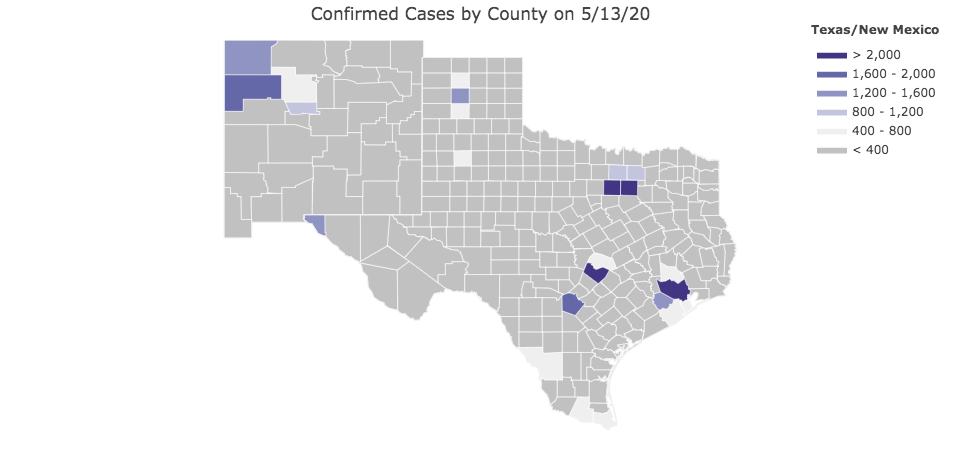

In [36]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

fips = txnm_case_data['FIPS']
values = txnm_case_data[date]

fig = ff.create_choropleth(fips=fips, values=values)
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['TX', 'NM'],
    binning_endpoints = [400,800,1200,1600,2000], 
    colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Texas/New Mexico', title= f'Confirmed Cases by County on {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

#plt.savefig('test.jpg',format='jpg')

In [37]:
from utils import create_new_key

date_cases = txnm_case_data[date]
old_date = create_new_key(date, delta)
old_date_cases = txnm_case_data[old_date]
period_cases = date_cases - old_date_cases

print(f'Total cases in Texas and New Mexico last {delta} days: {sum(period_cases)}')

Total cases in Texas and New Mexico last 7 days: 9103


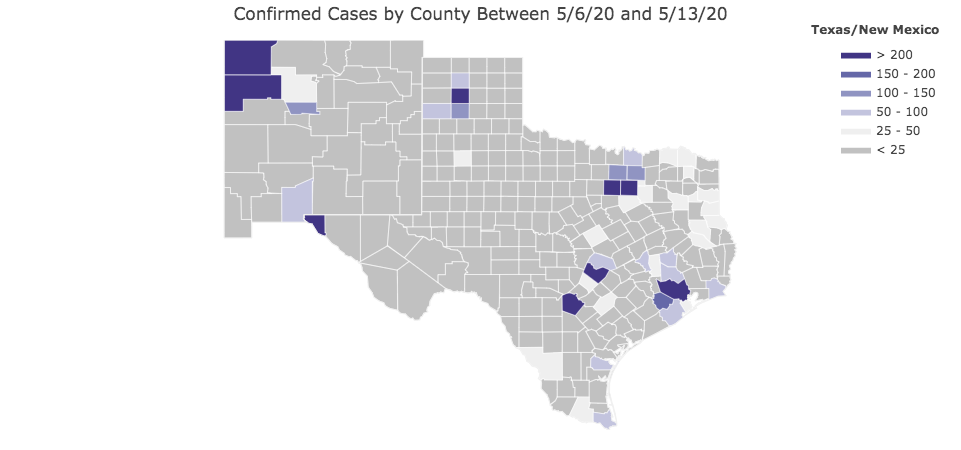

In [38]:
values = period_cases

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['NM', 'TX'],
    colorscale=colorscale,
    binning_endpoints = [25,50,100,150,200],
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Texas/New Mexico', title= f'Confirmed Cases by County Between {old_date} and {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

In [39]:
# Getting data for counties of interest

# List of counties of interest
counties_of_interest = ['El Paso', 'Hudspeth', 'Bell', 'Coryell', 'Lampasas', 'Burnet',
                        'Williamson', 'Milam', 'Robertson', 'Falls', 'Mclennan', 'Bosque',
                        'Hamilton', 'Mills', 'San Saba','Llano', 'Dona Ana', 'Otero']

# Dataframe for only counties of interest
coi_case_data = txnm_case_data[txnm_case_data['Admin2'].isin(counties_of_interest)]
coi_death_data = txnm_death_data[txnm_death_data['Admin2'].isin(counties_of_interest)]

# Getting death and case data for period
period_coi_cases = coi_case_data[date] - coi_case_data[old_date]
period_coi_deaths = coi_death_data[date] - coi_death_data[old_date]

In [40]:
# Total confirmed cases (date_cases), total confirmed deaths(date_deaths),
# cases in last week (period_cases), deaths in last week (period_deaths)

table_pd = pd.DataFrame({
    'County': coi_case_data['Admin2'],
    f'Total Confirmed Cases {date}': coi_case_data[date],
    f'Last {delta} Days Cases': period_coi_cases,
    f'Total Deaths {date}': coi_death_data[date],
    f'Last {delta} Days Deaths': period_coi_deaths
    })

table_pd

County  Total Confirmed Cases 5/13/20  Last 7 Days Cases  \
1807    Dona Ana                            249                 69   
1819       Otero                              8                 -1   
2541        Bell                            231                 21   
2545      Bosque                              6                  1   
2554      Burnet                             28                  4   
2577     Coryell                            217                 27   
2598     El Paso                           1413                333   
2600       Falls                              6                  0   
2624    Hamilton                              7                  2   
2642    Hudspeth                              0                  0   
2668    Lampasas                              8                  3   
2677       Llano                              3                  0   
2693       Milam                             20                  2   
2694       Mills                              1                  1   
2725   Robertson                              6                  2   
2733    San Saba                              0                  0   
2773  Williamson                            424                 83   

      Total Deaths 5/13/20  Last 7 Days Deaths  
1807                     2                   0  
1819                     0                   0  
2541                     3                   0  
2545                     0                   0  
2554                     0                   0  
2577                     2                   0  
2598                    33                  11  
2600                     0                   0  
2624                     0                   0  
2642                     0                   0  
2668                     0                   0  
2677                     0                   0  
2693                     1                   0  
2694                     0                   0  
2725                     0                   0  
2733                     0                   0  
2773                    16                   4

## JBLM code

In [41]:
# Getting Washington
wa_case_data = jhu_case_data[jhu_case_data['Province_State'].isin(['Washington'])]
wa_death_data = jhu_death_data[jhu_death_data['Province_State'].isin(['Washington'])]

# Getting rid of stupid FIPS
wa_case_data = wa_case_data[wa_case_data['FIPS']<80000]
wa_death_data = wa_death_data[wa_death_data['FIPS']<80000]

In [42]:
# Looking at the first five lines of the tx/nmcase data
wa_case_data.head(5)

UID iso2 iso3  code3     FIPS   Admin2 Province_State  \
2958  84053001   US  USA    840  53001.0    Adams     Washington   
2959  84053003   US  USA    840  53003.0   Asotin     Washington   
2960  84053005   US  USA    840  53005.0   Benton     Washington   
2961  84053007   US  USA    840  53007.0   Chelan     Washington   
2962  84053009   US  USA    840  53009.0  Clallam     Washington   

     Country_Region        Lat       Long_  ... 5/7/20  5/8/20  5/9/20  \
2958             US  46.982998 -118.560173  ...     49      49      49   
2959             US  46.188944 -117.202285  ...     18      18      18   
2960             US  46.239470 -119.512083  ...    550     559     575   
2961             US  47.870461 -120.617396  ...    139     140     143   
2962             US  48.047546 -123.922632  ...     19      19      19   

      5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  
2958       49       49       50       50       50       50       50  
2959       18       18       18       18       18       18       18  
2960      577      586      588      595      605      615      627  
2961      148      149      150      153      163      170      172  
2962       19       19       19       19       19       21       21  

[5 rows x 127 columns]

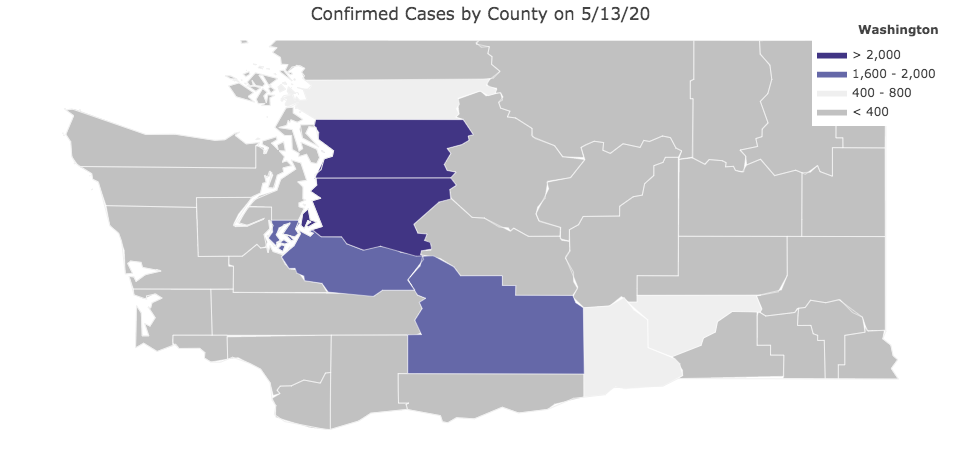

In [43]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

fips = wa_case_data['FIPS']
values = wa_case_data[date]

fig = ff.create_choropleth(fips=fips, values=values)
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['Washington'],
    binning_endpoints = [400,800,1200,1600,2000], 
    colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Washington', title= f'Confirmed Cases by County on {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

#plt.savefig('test.jpg',format='jpg')

In [44]:
from utils import create_new_key

date_cases = wa_case_data[date]
old_date = create_new_key(date, delta)
old_date_cases = wa_case_data[old_date]
period_cases = date_cases - old_date_cases

print(f'Total cases in Washington last {delta} days: {sum(period_cases)}')

Total cases in Washington last 7 days: 1595


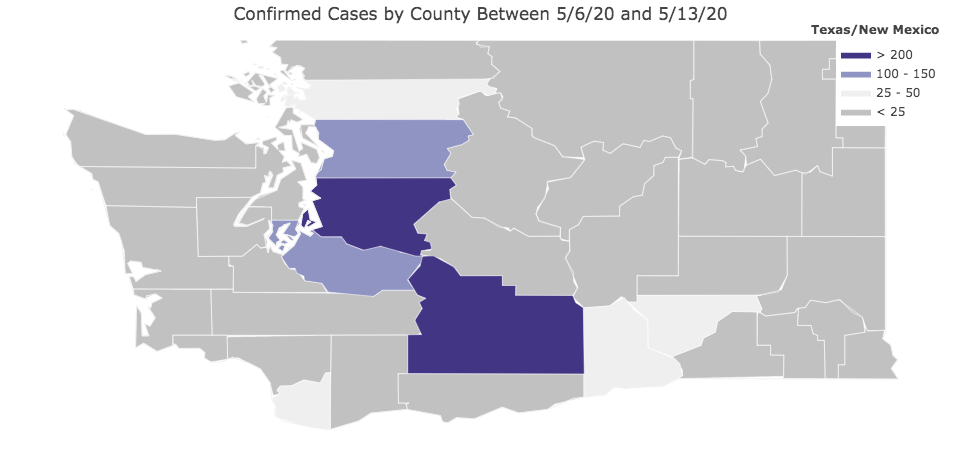

In [45]:
values = period_cases

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['WA'],
    colorscale=colorscale,
    binning_endpoints = [25,50,100,150,200],
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Texas/New Mexico', title= f'Confirmed Cases by County Between {old_date} and {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

In [46]:
# Getting data for counties of interest

# List of counties of interest
counties_of_interest = ['Pierce', 'Kitsap', 'Mason', 'Thurston', 'Lewis', 'Yakima',
                        'Kittitas', 'King']

# Dataframe for only counties of interest
coi_case_data = wa_case_data[wa_case_data['Admin2'].isin(counties_of_interest)]
coi_death_data = wa_death_data[wa_death_data['Admin2'].isin(counties_of_interest)]

# Getting death and case data for period
period_coi_cases = coi_case_data[date] - coi_case_data[old_date]
period_coi_deaths = coi_death_data[date] - coi_death_data[old_date]

In [47]:
# Total confirmed cases (date_cases), total confirmed deaths(date_deaths),
# cases in last week (period_cases), deaths in last week (period_deaths)

table_pd = pd.DataFrame({
    'County': coi_case_data['Admin2'],
    f'Total Confirmed Cases {date}': coi_case_data[date],
    f'Last {delta} Days Cases': period_coi_cases,
    f'Total Deaths {date}': coi_death_data[date],
    f'Last {delta} Days Deaths': period_coi_deaths
    })

table_pd

County  Total Confirmed Cases 5/13/20  Last 7 Days Cases  \
2974      King                           7212                508   
2975    Kitsap                            156                  5   
2976  Kittitas                             40                 25   
2978     Lewis                             33                  4   
2980     Mason                             30                  4   
2984    Pierce                           1604                150   
2991  Thurston                            122                  6   
2996    Yakima                           1946                497   

      Total Deaths 5/13/20  Last 7 Days Deaths  
2974                   518                  44  
2975                     2                   0  
2976                     0                   0  
2978                     3                   0  
2980                     1                   0  
2984                    60                   8  
2991                     1                   0  
2996                    68                  16

## SANDBOX

In [3]:
bliss_dct={'Texas':['El Paso', 'Hudspeth'],
           'New Mexico':['Dona Ana', 'Otero']}
hood_dct={'Texas':['Bell', 'Coryell', 'Lampasas', 'Burnet','Williamson', 'Milam', 'Robertson', 
                   'Falls', 'Mclennan', 'Bosque','Hamilton', 'Mills', 'San Saba','Llano']}
carson_dct={'Colorado':['Douglas', 'El Paso', 'Pueblo', 'Fremont', 'Teller', 'Elbert',
                        'Lincoln', 'Crowley', 'Custer']}
jblm_dct={'Washington':['Pierce', 'Kitsap', 'Mason', 'Thurston', 'Lewis', 'Yakima', 'Kittitas', 'King']}
irwin_dct={'California':['Inyo', 'Tulare', 'Kern', 'Los Angeles', 'Orange', 'Riverside'],
           'Nevada':['Nye', 'Clark']}
kirtland_dct={'New Mexico':['Bernalillo', 'Sandoval', 'Cibola', 'Valencia', 'Torrance', 'Santa Fe']}
sill_dct={'Oklahoma':['Comanche', 'Caddo', 'Kiowa', 'Tillman', 'Cotton', 'Stephens', 'Grady']}
riley_dct={'Kansas':['Geary', 'Riley', 'Marshall', 'Washington', 'Clay', 'Dickinson', 'Marion',
                     'Chase', 'Lyon', 'Wabaunsee', 'Pottawatomie']}
polk_dct={'Louisiana':['Vernon', 'Sabine', 'Natchitoches', 'Rapides', 'Allen', 'Beauregard'],
          'Texas':['Sabine','Newton']}
campbell_dct={'Kentucky':['Christian', 'Trigg', 'Caldwell', 'Hopkins', 'Muhienberg', 'Todd'],
              'Tennessee':['Montgomery', 'Stewart', 'Houston', 'Dickinson', 'Cheatham', 'Robertson']}
benning_dct={'Georgia':['Chattahoochee', 'Muscogee', 'Talbot', 'Marion', 'Webster', 'Stewart'],
             'Alabama':['Russell']}
stewart_dct={'Georgia':['Liberty', 'Bryan', 'Evans', 'Tattnall', 'Long', 'Mcintosh']}
bragg_dct={'North Carolina':['Cumberland', 'Hoke', 'Harnett', 'Moore', 'Robeson', 'Bladen', 'Sampson']}
belvoir_dct={'Virginia':['Fairfax', 'Alexandria', 'Arlington', 'Prince William', 'Loudoun'],
             'Maryland':['Montgomery', 'Prince George', 'District of Columbia', 'Charles']}
apg_dct={'Maryland':['Harford', 'Baltimore', 'Cecil', 'Kent'],
         'Pennsylvania':['York','Lancaster']}
drum_dct={'New York':['Jefferson', 'Oswego', 'Lewis', 'Saint Lawrence']}

#combining dictionaries for 20th
base_dct={'bliss':bliss_dct, 'hood':hood_dct, 'carson':carson_dct, 'jblm':jblm_dct, 
          'irwin':irwin_dct, 'kirtland':kirtland_dct, 'sill':sill_dct, 'riley':riley_dct,
          'polk':polk_dct, 'campbell':campbell_dct, 'benning':benning_dct, 'stewart':stewart_dct,
          'bragg':bragg_dct, 'belvoir':belvoir_dct, 'apg':apg_dct, 'drum':drum_dct}

#FIPS dictionary
fips_dct={'bliss':80000, 'carson':10000, 'hood':100000, 'jblm':100000, 'irwin':100000, 'kirtland':100000,
          'sill':100000, 'riley':100000, 'polk':100000, 'campbell':100000, 'benning':100000,
          'stewart':100000, 'bragg':100000, 'belvoir':100000, 'apg':100000, 'drum':100000,}

#State string to pull from master
states=['Colorado', 'Texas', 'Washington', 'California', 'Nevada', 'New Mexico', 'Oklahoma', 'Kansas',
           'Louisiana', 'Kentucky', 'Tennessee', 'Georgia', 'Alabama', 'North Carolina', 'Virginia',
           'Maryland', 'Pennsylvania', 'New York']


In [47]:
from utils import get_weekly_cases
from utils import create_new_key
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(base_dct, fips_cutoff, date, folder, delta=7, echo=14):
    """
    date: # Day to plot in first figure e.g. '5/13/20'
    delta: How far back to plot in second figure
    echo: How far back to get rate compared to previous week
    """
    # Getting State X - base to state dictionary
    states = list(base_dct.keys())
    case_data = jhu_case_data[jhu_case_data['Province_State'].isin(states)]
    death_data = jhu_death_data[jhu_death_data['Province_State'].isin(states)]

    # Getting rid of stupid FIPS
    case_data = case_data[case_data['FIPS']<fips_cutoff]
    death_data = death_data[death_data['FIPS']<fips_cutoff]

    #CREATING TOTAL INCIDENT MAP
    import plotly.figure_factory as ff
    import matplotlib.pyplot as plt

    #change WA to general state value
    fips = case_data['FIPS']
    values = case_data[date] 

    #fig = ff.create_choropleth(fips=fips, values=values)
    colorscale = [
        'rgb(193, 193, 193)',
        'rgb(239,239,239)',
        'rgb(195, 196, 222)',
        'rgb(144,148,194)',
        'rgb(101,104,168)',
        'rgb(65, 53, 132)'
    ]
    
    plt.figure(figsize=(5,5))
    fig = ff.create_choropleth(
        #base to state dct again?
        fips=fips, values = values, scope=states,
        binning_endpoints = [400,800,1200,1600,2000], 
        colorscale=colorscale,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
        #How to replace state?
        legend_title=f'Cases', title= f'Confirmed Cases by County by {date}',
        show_hover=True, centroid_marker={'opacity': 0}
    )
    fig.layout.template = None
    plt.savefig(f"{folder}/{base}_total_{date.replace('/','-')}.png",format='png')
    fig.show()

    #CREATE VARIABLES FOR LAST WEEK
    date_cases = case_data[date]
    old_date = create_new_key(date, delta)
    old_date_cases = case_data[old_date]
    period_cases = date_cases - old_date_cases
    
    # cases the previous week

    prev_old_date = create_new_key(date, echo)
    prev_old_date_cases = case_data[prev_old_date]
    prev_period_cases = date_cases - prev_old_date_cases 


    #CREATE LAST 7 MAP
    values = period_cases

    colorscale = [
        'rgb(193, 193, 193)',
        'rgb(239,239,239)',
        'rgb(195, 196, 222)',
        'rgb(144,148,194)',
        'rgb(101,104,168)',
        'rgb(65, 53, 132)'
    ]
    
    plt.figure(figsize=(5,5))
    fig = ff.create_choropleth(
        fips=fips, values = values, scope=states,
        colorscale=colorscale,
        binning_endpoints = [25,50,100,150,200],
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
        legend_title=f'Cases', title= f'Confirmed Cases by County Between {old_date} and {date}',
        show_hover=True, centroid_marker={'opacity': 0}
    )
    fig.layout.template = None
    plt.savefig(f"{folder}/{base}_last_7_{date.replace('/','-')}.png",format='png')
    fig.show() 


    #CREATE BAR GRAPH
    week_ending_df = get_weekly_cases(case_data, date, '2/1/20')

    plt.figure(figsize=(5,5))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="Week Ending", y="New Cases", data= week_ending_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    ax.figure.savefig(f"{folder}/{base}_weekly_cases_{date.replace('/','-')}.png")
    plt.show()
    # Note -- right now we ove
        
    for state in states:
        #CREATE TABLE VARIABLES
        # List of counties of interest
        counties_of_interest = base_dct[state]

        # Dataframe for only counties of interest
        coi_case_data = case_data[case_data['Admin2'].isin(counties_of_interest)]
        coi_death_data = death_data[death_data['Admin2'].isin(counties_of_interest)]

        # Getting death and case data for period
        period_coi_cases = coi_case_data[date] - coi_case_data[old_date]
        period_coi_deaths = coi_death_data[date] - coi_death_data[old_date]
        prev_period_coi_cases = coi_case_data[old_date] - coi_case_data[prev_old_date]
        period_coi_rate = period_coi_cases/(prev_period_coi_cases-period_coi_cases)
        
        #CREATE TABLE
        table_pd = pd.DataFrame({
            'County': coi_case_data['Admin2'],
            f'Total Confirmed Cases {date}': coi_case_data[date],
            f'Last {delta} Days Cases': period_coi_cases,
            #f'Rate' : period_coi_rate,
            f'Total Deaths {date}': coi_death_data[date],
            f'Last {delta} Days Deaths': period_coi_deaths
            })
        display(table_pd) 
        
        #Making Excel File
        table_pd.to_csv(f"{folder}/{base}_{state}-{date.replace('/','-')}-{old_date.replace('/','-')}.csv",index=False)
    return

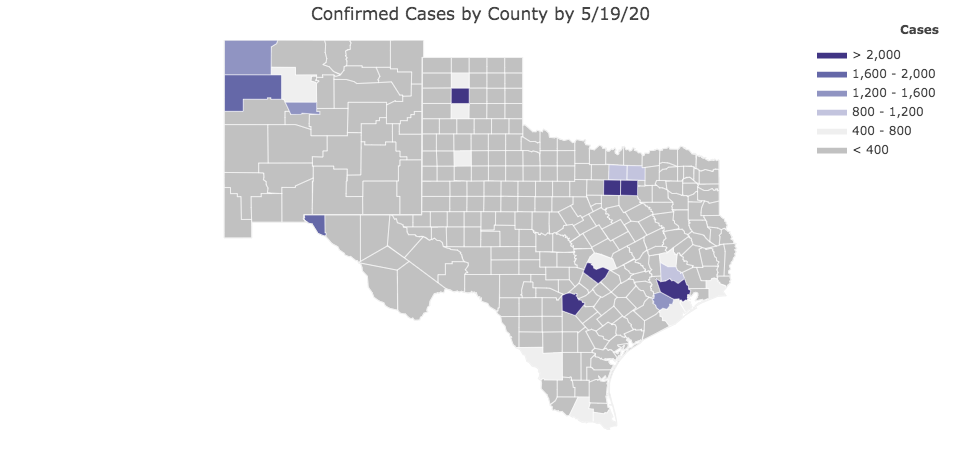

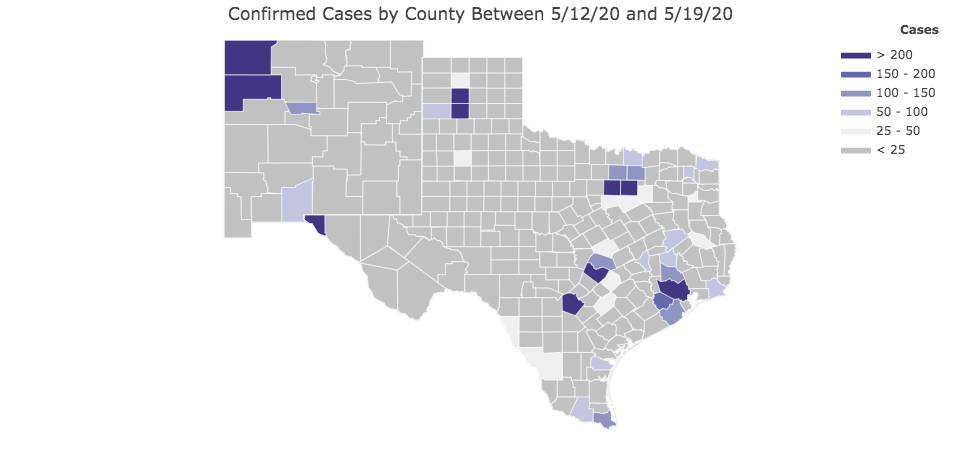

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

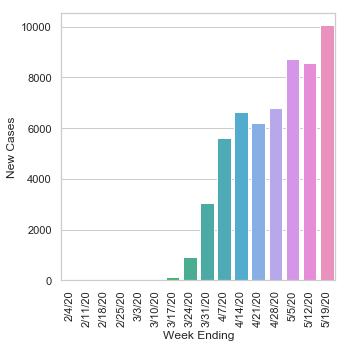

County  Total Confirmed Cases 5/19/20  Last 7 Days Cases  \
2598   El Paso                           1852                504   
2642  Hudspeth                              0                  0   

      Total Deaths 5/19/20  Last 7 Days Deaths  
2598                    52                  19  
2642                     0                   0

County  Total Confirmed Cases 5/19/20  Last 7 Days Cases  \
1807  Dona Ana                            319                 74   
1819     Otero                              8                 -1   

      Total Deaths 5/19/20  Last 7 Days Deaths  
1807                     2                   0  
1819                     1                   1

In [48]:
%matplotlib inline
import os

bases = ['bliss', 'hood', 'carson', 'jblm', 'kirtland', 'irwin', 'sill', 'riley', 'polk', 'campbell', 'benning', 
         'stewart', 'bragg', 'belvoir', 'apg', 'drum']

#bases = ['bliss']

# Date to start analysis
start_date = '5/19/20'

# Making folder for this date
folder = f"output-{'-'.join(start_date.split('/'))}"
if not os.path.exists(folder):
    os.mkdir(folder)

# Plotting for every state
for base in bases:
    plot_data(base_dct[base], fips_dct[base], start_date, folder, delta=7, echo=14)

In [17]:
from utils import get_date_time_from_key, create_new_key

case_data = jhu_case_data[jhu_case_data['Province_State'].isin(['Washington'])]

start_date = '5/19/20'
end_date = '2/1/20'
current_date = start_date
week_ending_cases={}

while get_date_time_from_key(current_date)>get_date_time_from_key(end_date):
    date_cases = case_data[current_date]
    old_date = create_new_key(current_date, 7)
    old_date_cases = case_data[old_date]
    period_cases = date_cases - old_date_cases
    week_ending_cases[current_date] = sum(period_cases) 
    current_date = old_date


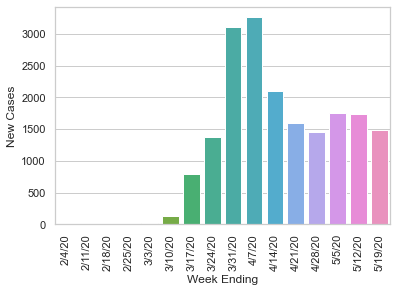

In [33]:
%matplotlib inline

import seaborn as sns
import pandas as pd

week_ending_df = pd.DataFrame.from_dict({'Week Ending': list(week_ending_cases.keys())[::-1],
                                           'New Cases': list(week_ending_cases.values())[::-1]})
sns.set(style="whitegrid")
ax = sns.barplot(x="Week Ending", y="New Cases", data= week_ending_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax

In [32]:
week_ending_df


Week Ending  Cases
0       2/4/20      0
1      2/11/20      0
2      2/18/20      0
3      2/25/20      0
4       3/3/20     26
5      3/10/20    140
6      3/17/20    788
7      3/24/20   1373
8      3/31/20   3104
9       4/7/20   3260
10     4/14/20   2107
11     4/21/20   1593
12     4/28/20   1450
13      5/5/20   1752
14     5/12/20   1736
15     5/19/20   1481

In [ ]:
print(list(co_data.keys()))

In [ ]:
# Build figure object (in case fig is a dictionary)
fig = go.Figure(fig)

# Get hover trace
hover_scatter = [scatt for scatt in fig.data if scatt.mode == 'markers'][0]

# Update text to include only county (Not state, FIPS, ec.)
import re
def extract_county(text_val):
    return re.sub(r'County: (.*?)<br>.*', r'\1', text_val)

hover_scatter.text = [extract_county(text_val) for text_val in hover_scatter.text]

# Show text
hover_scatter.mode = 'markers+text'

# Set font properties
hover_scatter.textfont.size = 8

In [42]:
#4/30 - 4/29 for all of CO for 
15284-14758

526

In [143]:
new_key = create_new_key('04/30/20',6)

In [142]:
new_key

'4/24/20'

In [ ]:
import datetime
from datetime import timedelta

def create_new_key(dt, days):
    month, day, year = dt.split('/')
    if len(day) == 1:
        day = '0'+day
    if len(month) ==1:
        month = '0'+month
    old_datetime = datetime.datetime.strptime('/'.join((month,day,year)), '%m/%d/%y')
    new_datetime = old_datetime - timedelta(days=days)
    new_date = new_datetime.strftime('%m/%d/%y')
    month, day, year = new_date.split('/')
    if month[0] == '0':
        month = month[1]
    elif day[0] == '0':
        day = day[1]
    return '/'.join((month, day, year))